In [8]:
#### from os import listdir, path
from os.path import isfile, join
import re
import csv
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

def read_data(file_name):
    x_threads = []
    x_size = []
    y_average = []
    with open(file_name, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            threads_number = int(row['threads_number'])
            file_size = float(row['size'])
            average = float(row['collect_time'])
            x_threads.append(int(threads_number))
            x_size.append(int(file_size))
            y_average.append(float(average))
    return x_threads, x_size, y_average


In [10]:
x_threads, x_size, y_average = read_data('results.csv')

import pandas as pd

df = pd.DataFrame({'threads': x_threads, 'size': x_size, 'time': y_average})
df = df.sort_values(['size', 'threads'])
with pd.option_context('display.max_rows', 100, 'display.max_columns', 5):
    print(df)


    threads  size     time
8       100    12    8.000
0       250    12   23.000
9       100    23   11.500
1       250    23   44.500
28       52    35    6.125
10      100    35   19.000
2       250    35   78.500
15      500    35  116.000
23      700    35  235.000
25       25    46    8.750
11      100    46   23.500
3       250    46   91.500
16      500    46  160.500
20      700    46  254.000
26       25    69    9.750
12      100    69   49.000
4       250    69  160.500
17      500    69  228.500
21      700    69  427.000
27       25   103   13.750
13      100   103  144.000
5       250   103  247.000
18      500   103  431.500
22      700   103  747.000
29       25   138   19.000
14      100   138  246.000
6       250   138  350.000
7       250   138  341.000
19      500   138  502.000
24      700   138  982.000


In [11]:
import numpy as np
def func(X, a, b):
    size, threads = X
    return a * threads * size + b * threads*size*size 

In [12]:
popt, pcov = curve_fit(func, (x_size, x_threads), y_average, bounds=([[0.0075, 0.00001], [0.0078, 0.00002]]))
print(popt, pcov)

[7.65724451e-03 1.39314283e-05] [[ 9.29018916e-07 -7.67438071e-09]
 [-7.67438071e-09  6.86258464e-11]]


In [13]:
a = popt[0]
b = popt[1]
c = 0.00795388
s = 1
coef = [a*s + b * s ** 2, 0, -c*100000]
root = [ int(x.real) for x in np.roots(coef) if np.isreal(x)]
sorted([(x, 2) for x in root], key=lambda x: x[1])

[(-322, 2), (322, 2)]

0.9864744489824698
16.72130185652778


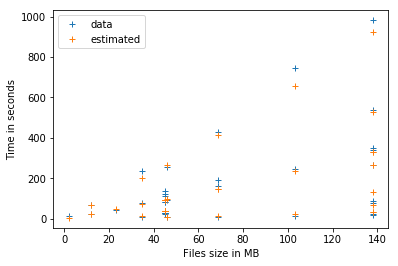

In [18]:
x_threads_test, x_size_test, y_average_test = read_data('results2.csv')

from math import sqrt
def calc(estim, rel):
    res = [np.sqrt((y - x)**2) for x, y in zip(estim, rel)]
    res = sum(res) / len(res)
    return res
            
    
estimated_result = [func((x, y), popt[0], popt[1]) for x, y in zip(x_size_test, x_threads_test)]

from sklearn.metrics import r2_score

print(r2_score(y_average_test, estimated_result))

print(calc(estimated_result, y_average_test))

plt.plot(x_size_test, y_average_test, '+', label='data')
plt.plot(x_size_test, estimated_result, '+', label='estimated')
plt.xlabel("Files size in MB")
plt.ylabel("Time in seconds")

plt.legend()
plt.show()
